In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import *

In [2]:
gene="LDLRAD3"

In [3]:
cmd=" ".join(["for f in $(find /oak/stanford/groups/mrivas/ukbb24983/cnv/gene_burden_test/",
              "-name '*.linear' -o -name '*.hybrid' | grep white_british);",
              "do",
              "phe=$(echo $f | awk -F'.' '{print $2}');"
              "awk -v p=$phe -v OFS='\\t' -v g="+gene,
              "'($NF < 0.01 && $3 == g && $NF !~ /NA/){print p,$1,$2,$3,$4,$5,$6,$(NF-5),$(NF-4),$(NF-3),$(NF-2),$(NF-1),$NF}'",
              "$f;",
              "done",
              ">",
              "/oak/stanford/groups/jpriest/cnv_ukb/subanalyses/phewas/"+gene+"_wb_phewas_p001.tsv"
             ])
os.system(cmd)

0

In [26]:
phenos = pd.read_table("/oak/stanford/groups/jpriest/cnv_ukb/subanalyses/phewas/"+gene+"_wb_phewas_p001.tsv", 
                       usecols=[0,8,9,10,11,12],
                       names=["PHENO","N","BETA","SE","TSTAT","P"])
phenos.head()

,PHENO,N,BETA,SE,TSTAT,P
0,MED1141166200,333522,233.30100,1.673160,3.25871,0.001119
1,MED1140871196,333522,54.77310,1.482180,2.70089,0.006915
2,MED1141185316,333522,52.31450,1.505780,2.62806,0.008587
3,MED1141168944,333522,86.78390,1.549990,2.87965,0.003981
4,INI50,332826,-0.55505,0.160912,-3.44940,0.000562


In [27]:
with open("/oak/stanford/groups/mrivas/users/magu/repos/rivas-lab/ukbb-tools/05_gbe/icdinfo.txt", "r") as i:
    names = {line.split()[0]:line.split()[2] for line in i if int(line.split()[1]) > 499}

phenos['BIN']  = phenos['PHENO'].apply(lambda x: 0 if 'QT' in x or 'INI' in x else 1)
phenos['BETA'] = phenos.apply(lambda row: np.log(row['BETA']) if row['BIN'] == 1 else row['BETA'], axis=1)
phenos['NAME'] = phenos['PHENO'].apply(lambda x: names.get(x) if x in names 
                                                 else names.get(x.replace('QT_FC', 'INI')) if x.replace('QT_FC','INI') in names 
                                                 else names.get(x.replace('BIN_FC','HC')) if x.replace('BIN_FC','HC') in names
                                                 else np.nan)
phenos.dropna(inplace=True)
phenos['-log10P'] = phenos['P'].apply(lambda x:-np.log10(x))

phenos.head(15)

,PHENO,N,BETA,SE,TSTAT,P,BIN,NAME,-log10P
4,INI50,332826,-0.555050,0.160912,-3.44940,5.619130e-04,0,Standing_height,3.250331
6,BIN_FC10001259,308649,1.515778,0.501889,3.02014,2.526540e-03,1,Smoking/smokers_in_household,2.597474
9,MED1140881856,333522,2.196698,0.748833,2.93349,3.351710e-03,1,salbutamol,2.474734
17,MED1140874790,333522,3.489092,1.031270,3.38331,7.161690e-04,1,betamethasone,3.144984
19,INI3436,24911,3.108140,0.983905,3.15898,1.585120e-03,0,Age_started_smoking_in_current_smokers,2.799938
41,BIN_FC10020171,85106,2.839990,0.868478,3.27008,1.075180e-03,1,FI4_:_positional_arithmetic,2.968519
45,MED1141146606,333522,4.141314,0.774061,5.35011,8.790050e-08,1,calcium_carbonate+cholecalciferol_1.25g/200iu_...,7.056009
48,MED1140866236,333522,3.370109,1.035970,3.25308,1.141600e-03,1,spironolactone,2.942486
50,MED2038459814,333522,3.902686,0.790100,4.93948,7.832970e-07,1,digoxin,6.106074
54,MED1140888552,333522,2.695444,0.759387,3.54950,3.859680e-04,1,enalapril,3.413449


In [28]:
phenos[(phenos['P'] < 0.001)].sort_values('P')

,PHENO,N,BETA,SE,TSTAT,P,BIN,NAME,-log10P
45,MED1141146606,333522,4.141314,0.774061,5.35011,8.790050e-08,1,calcium_carbonate+cholecalciferol_1.25g/200iu_...,7.056009
244,MED1000000048,333522,3.907776,0.790580,4.94292,7.695940e-07,1,digoxin_generic,6.113738
50,MED2038459814,333522,3.902686,0.790100,4.93948,7.832970e-07,1,digoxin,6.106074
193,BIN4092,126936,-3.061964,0.832055,-3.68000,2.332340e-04,1,Heel_ultrasound_method_(left),3.632208
194,BIN4095,127063,-3.038074,0.831518,-3.65365,2.585430e-04,1,Heel_ultrasound_method_(right),3.587467
261,RH110,333522,2.730679,0.762938,3.57916,3.447020e-04,1,Cerebral_Infarction,3.462556
294,HC326,333522,2.136362,0.601026,3.55453,3.786610e-04,1,heart_attack/myocardial_infarction,3.421749
54,MED1140888552,333522,2.695444,0.759387,3.54950,3.859680e-04,1,enalapril,3.413449
312,HC114,333522,3.657866,1.034120,3.53717,4.044380e-04,1,pericardial_effusion,3.393148
232,MED1000000053,333522,2.671587,0.759647,3.51688,4.366580e-04,1,enalapril_generic,3.359859


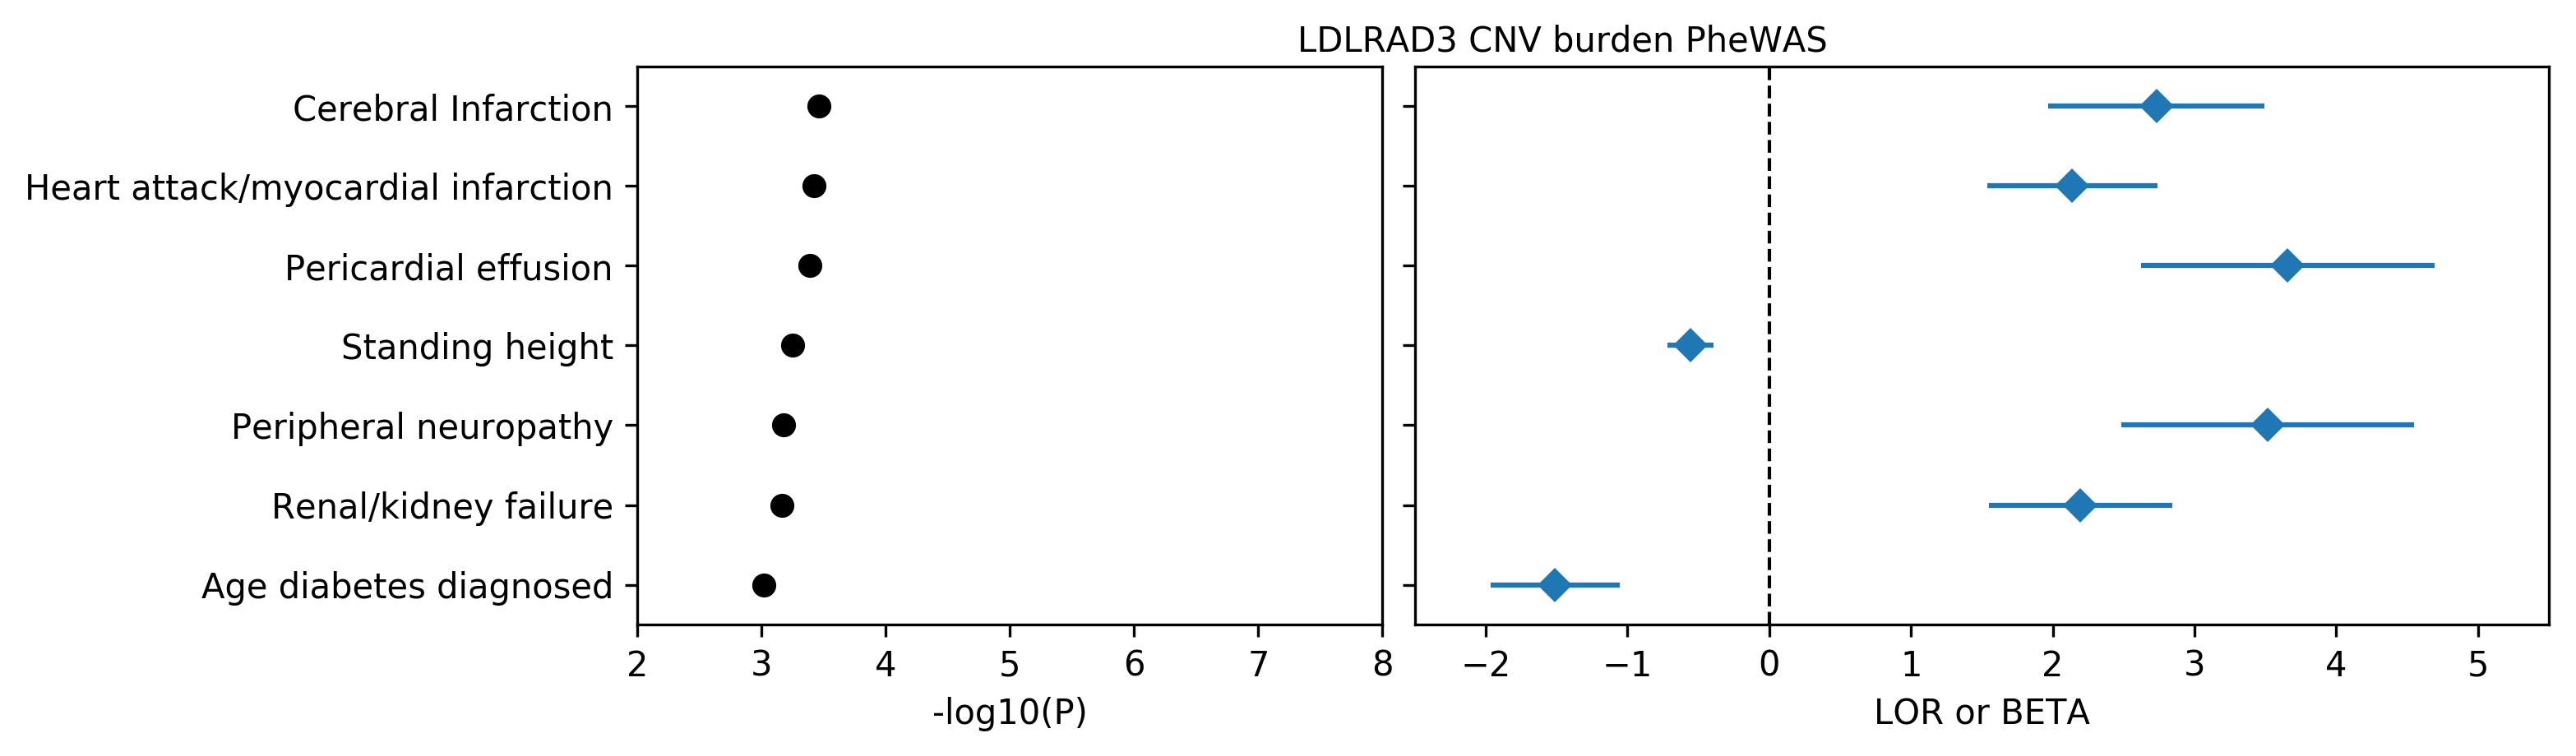

In [30]:
# do the plot
filter_kw = lambda s: all([i not in s for i in ['3mm','method']])

y_ht = 3
fig  = plt.figure(figsize=(10, y_ht), dpi=300)
grid = plt.GridSpec(y_ht, 10, hspace=0.3)


for cnv_ix, cnv in enumerate([gene]):
    # select significant data, truncate visualization
    data = phenos.loc[(~phenos['NAME'].isnull()) & 
                      (phenos['NAME'].apply(filter_kw)) & 
                      (phenos['PHENO'].apply(lambda s:'MED' not in s))].query('P < 1e-3').copy()
    
    data = data.query('SE < 2').sort_values('P').head(50).copy()
    # group by QT/BIN status, plus fat measurement for second CNV
    order = [irow[0] for irow in sorted([irow for irow in data.iterrows()], 
                                         key=lambda (i,x): -x['P'] + 0*x['BIN'])] 

    # title
    fig.text(0.5, 0.9, gene + ' CNV burden PheWAS', horizontalalignment='center')
    
    # p-values
    ax = fig.add_subplot(grid[:,:4])
    ax.plot([data.loc[i,'-log10P'] for i in order], list(range(len(order))), 'ko')
    ax.set_ylim(-0.5,len(order)-0.5)
    ax.set_yticks(list(range(len(order)))) 
    ax.set_yticklabels(list(map(lambda s:s[0].upper() + s[1:].replace('_',' '), [data.loc[i,'NAME'] for i in order])))
    ax.set_xlabel('-log10(P)')
    ax.set_xlim(2,8)

    # betas
    ax = fig.add_subplot(grid[:,4:])
    ax.errorbar(x=[data.loc[i,'BETA'] for i in order], 
                y=list(range(len(order))),
                xerr=[data.loc[i,'SE'] for i in order],
                linestyle='', marker='D')
    ax.set_ylim(-0.5,len(order)-0.5)
    ax.set_yticks(list(range(len(order))))
    ax.set_yticklabels(['' for _ in order])
    ax.set_xlabel('LOR or BETA')
    ax.set_xlim(-2.5,5.5)
    ax.yaxis.set_label_position("right")

    # dash line for betas
    plt.plot([0,0], ax.get_ylim(), 'k--', linewidth=1)

plt.show()